In [46]:
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
%matplotlib inline

In [66]:
##### Fruit vs. Vege. #######
data_ratio = [0.2, 0.4, 0.6, 0.8, 1.0]
A_fc = [83.13, 89.11, 90.89, 91.39, 92.45]
A_cc = [75.74, 82.71, 85.58, 86.28, 88.07]
A_fc_tr = [85.8, 91.1, 92.4, 93.2, 94.0]
A_cc_tr = [81.0, 84.7, 85.3, 87.8, 89.0]

In [64]:
##### Dog vs. Cat #######
data_ratio = [0.2, 0.4, 0.6, 0.8, 1.0]
A_fc = [84.68, 89.96, 91.04, 92.68, 93.24]
A_cc = [79.96, 86.60, 90.00, 92.12, 92.12]
A_fc_tr = [85.7, 90.6, 92.6, 93.9, 94.3]
A_cc_tr = [83.0, 88.4, 90.9, 91.9, 91.9]

In [67]:
############# Plot Accuracy vs. Datanum ################
font = {'family' : 'Times New Roman',
        'size'   : 17}
matplotlib.rc('font', **font)
plt.figure(figsize=(4, 3), dpi=300)
rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 10, 
    'axes.titlesize': 17, 'xtick.labelsize': 10, 'ytick.labelsize': 10,
    'lines.linewidth': 2}
plt.rcParams.update(**rc)
plt.plot(data_ratio, A_fc, '--o', color='r', label='F_Train_C_Test')
plt.plot(data_ratio, A_cc, '--o', color='b', label='C_Train_C_Test')
plt.plot(data_ratio, A_fc_tr, '-*', color='r', label='F_Train_C_Train')
plt.plot(data_ratio, A_cc_tr, '-*', color='b', label='C_Train_C_Train')
plt.xlabel('Data amount',fontweight='bold')
plt.ylabel('Accuracy (%)',fontweight='bold')
plt.legend(loc='lower right', ncol=1)
plt.axis([0.2, 1, 78, 95])
plt.grid(color='k', linestyle='--', linewidth=0.5)
# plt.tight_layout()
#plt.show()
plt.savefig('figs/fruit_datanum.png', bbox_inches='tight', dpi=600)
plt.close()


In [73]:
########### Plot training curves #################
# name = 'cifar100_animal_curve'
# log_file_fc = 'results/2018-05-12_03-46-02/log.txt'
# log_file_cc = 'results/2018-05-11_19-42-41/log.txt'

name = 'fruit_curve'
log_file_fc = 'results/2018-05-13_14-34-12/log.txt'
log_file_cc = 'results/2018-05-13_20-58-21/log.txt'

if os.path.isfile(log_file_fc):
    train_prec = {}
    test_prec = {}
    with open(log_file_fc) as inputfile:
        for line in inputfile:
            if 'Training Prec@1 f2c' in line:
                match0 = re.search('Epoch: \[[0-9]+\]', line)
                match1 = re.search('Training Prec@1 f2c [0-9]*\.?[0-9]+', line)
                train_prec[int(match0.group(0)[len('Epoch: ['):-1])] = float(match1.group(0)[len('Training Prec@1 f2c '):])
            elif 'Testing Prec@1' in line:
                match0 = re.search('Epoch: [0-9]+', line)
                match1 = re.search('Testing Prec@1 [0-9]*\.?[0-9]+', line)
                test_prec[int(match0.group(0)[len('Epoch: '):])] = float(match1.group(0)[len('Testing Prec@1 '):])

    A_fc_train = [train_prec[i] for i in range(len(train_prec))]
    A_fc_test = [test_prec[i] for i in range(len(test_prec))]
    
if os.path.isfile(log_file_cc):
    train_prec = {}
    test_prec = {}
    with open(log_file_cc) as inputfile:
        for line in inputfile:
            if 'Training Prec@1' in line:
                match0 = re.search('Epoch: \[[0-9]+\]', line)
                match1 = re.search('Training Prec@1 [0-9]*\.?[0-9]+', line)
                train_prec[int(match0.group(0)[len('Epoch: ['):-1])] = float(match1.group(0)[len('Training Prec@1 '):])
            elif 'Testing Prec@1' in line:
                match0 = re.search('Epoch: [0-9]+', line)
                match1 = re.search('Testing Prec@1 [0-9]*\.?[0-9]+', line)
                test_prec[int(match0.group(0)[len('Epoch: '):])] = float(match1.group(0)[len('Testing Prec@1 '):])

    A_cc_train = [train_prec[i] for i in range(len(train_prec))]
    A_cc_test = [test_prec[i] for i in range(len(test_prec))]
    


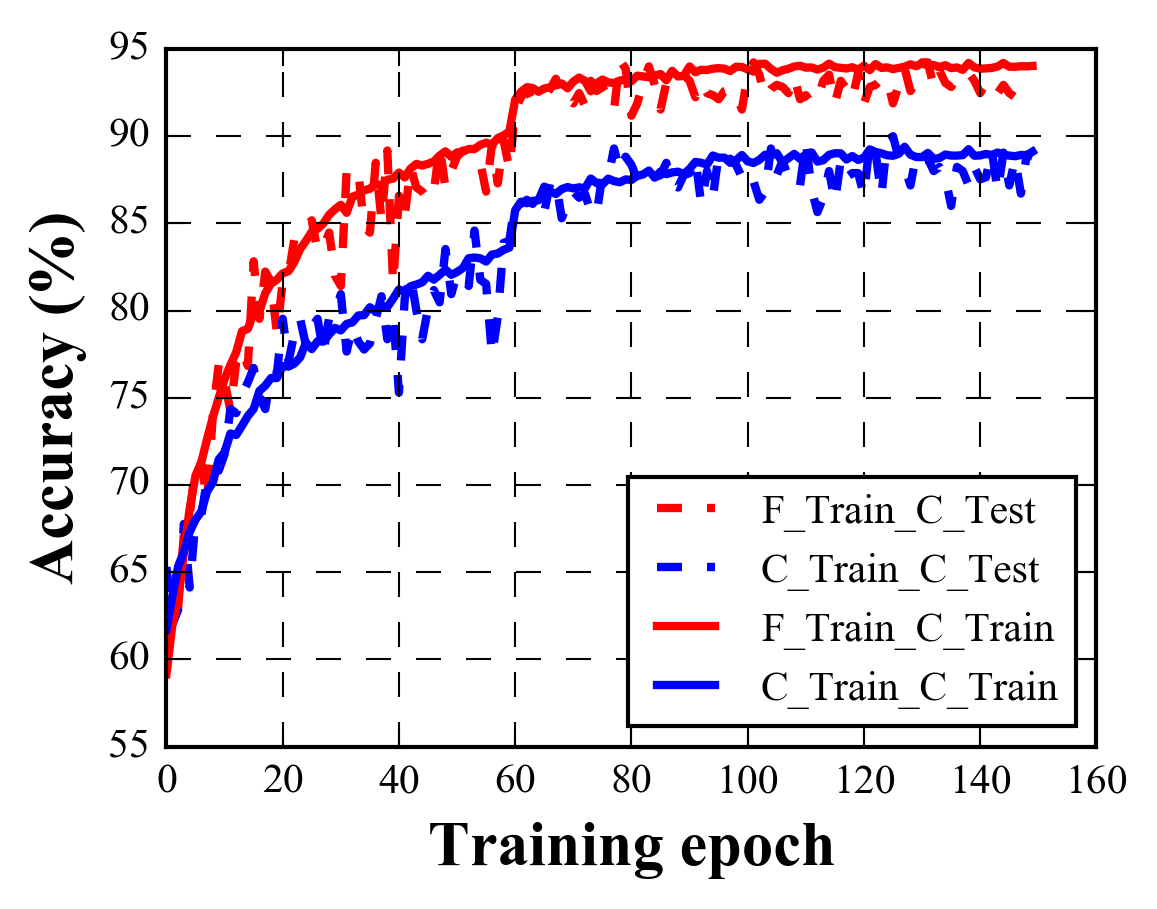

In [74]:
font = {'family' : 'Times New Roman',
        'size'   : 17}
matplotlib.rc('font', **font)
plt.figure(figsize=(4, 3), dpi=300)
rc={'font.size': 15, 'axes.labelsize': 15, 'legend.fontsize': 10, 
    'axes.titlesize': 17, 'xtick.labelsize': 10, 'ytick.labelsize': 10,
    'lines.linewidth': 2}
plt.rcParams.update(**rc)
plt.plot(range(len(A_fc_test)), A_fc_test, '--', color='r', label='F_Train_C_Test')
plt.plot(range(len(A_cc_test)), A_cc_test, '--', color='b', label='C_Train_C_Test')
plt.plot(range(len(A_fc_train)), A_fc_train, '-', color='r', label='F_Train_C_Train')
plt.plot(range(len(A_cc_train)), A_cc_train, '-', color='b', label='C_Train_C_Train')
plt.xlabel('Training epoch',fontweight='bold')
plt.ylabel('Accuracy (%)',fontweight='bold')
plt.legend(loc='lower right', ncol=1)
#plt.axis([0.2, 1, 78, 95])
plt.grid(color='k', linestyle='--', linewidth=0.5)
# plt.tight_layout()
#plt.show()
plt.savefig('figs/'+name+'.png', bbox_inches='tight', dpi=600)
#plt.close()
